# CSC8637- Deep Learning - Task 2 - Bird Classification
### We used VGG16 to classify bird images(code run on Colab)

In [83]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:

# Importing Necessary Libraries
import numpy as np
import pandas as pd
import glob
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [93]:
#!unzip '/content/drive/MyDrive/birds.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/TEAL DUCK/112.jpg  
  inflating: train/TEAL DUCK/113.jpg  
  inflating: train/TEAL DUCK/114.jpg  
  inflating: train/TEAL DUCK/115.jpg  
  inflating: train/TEAL DUCK/116.jpg  
  inflating: train/TEAL DUCK/117.jpg  
  inflating: train/TEAL DUCK/118.jpg  
  inflating: train/TEAL DUCK/119.jpg  
  inflating: train/TEAL DUCK/120.jpg  
  inflating: train/TEAL DUCK/121.jpg  
  inflating: train/TEAL DUCK/122.jpg  
  inflating: train/TEAL DUCK/123.jpg  
  inflating: train/TEAL DUCK/124.jpg  
  inflating: train/TEAL DUCK/125.jpg  
  inflating: train/TEAL DUCK/126.jpg  
  inflating: train/TEAL DUCK/127.jpg  
  inflating: train/TEAL DUCK/128.jpg  
  inflating: train/TEAL DUCK/129.jpg  
  inflating: train/TEAL DUCK/130.jpg  
  inflating: train/TEAL DUCK/131.jpg  
  inflating: train/TEAL DUCK/132.jpg  
  inflating: train/TEAL DUCK/133.jpg  
  inflating: train/TEAL DUCK/134.jpg  
  inflating: train/TEAL DUCK/135.jpg  
  inflating: 

In [94]:
# data directories
import pathlib
train_dir = pathlib.Path('/content/train')
val_dir = pathlib.Path('/content/valid')
test_dir = pathlib.Path('/content/test')

In [95]:
# Dataset
image_size=(224, 224)
batch_size=32
train = image_dataset_from_directory(train_dir, label_mode="categorical", batch_size=batch_size, image_size=image_size)
val = image_dataset_from_directory(val_dir, label_mode="categorical", batch_size=batch_size, image_size=image_size)
test = image_dataset_from_directory(test_dir, label_mode="categorical", batch_size=batch_size, image_size=image_size)

Found 35215 files belonging to 250 classes.
Found 1250 files belonging to 250 classes.
Found 1250 files belonging to 250 classes.


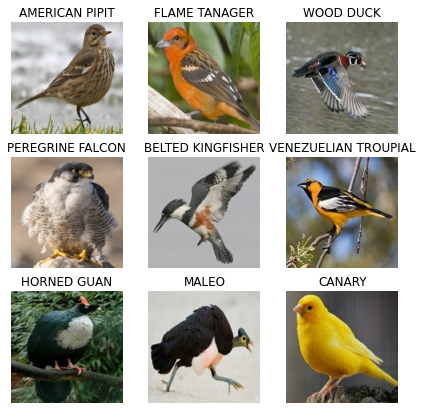

In [96]:
# Class names
lbl = train.class_names
# Some images from the train dataset
for images, labels in train.take(1):
    labels = np.argmax(labels, axis=-1)
    plt.figure(figsize=(7, 7))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(lbl[labels[i]])
        plt.axis('off')

plt.show()

In [97]:
# Pretrained vgg16
pretrained = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

In [98]:
# making pretained_model non-trainable
pretrained.trainable = False

In [104]:
#adding_top-layers on existing model
from tensorflow.keras.layers import Dropout
learn = Sequential()
learn.add(pretrained)
learn.add(GlobalAveragePooling2D())
learn.add(Flatten())
learn.add(Dense(units=512, activation='relu'))
learn.add(Dense(units=1024, activation='relu'))
learn.add(Dense(units=250, activation='softmax'))

In [105]:
learn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_5   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 1024)              525312    
                                                                 
 dense_17 (Dense)            (None, 250)               256250    
                                                      

In [106]:
#import some libraries - if needed
import keras
import keras.utils
from keras import utils as np_utils

In [107]:
#importing optimizer
from tensorflow.keras.optimizers import Adam
# mamking the model metrics
model_metrics=[ 'accuracy']
# Defining optimizer
optimizer = Adam(lr=0.001)

           
#Compiling the model
learn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics= model_metrics)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [108]:
# training the model

#history = learn.fit(train, epochs=15,validation_data=val, verbose=1)


Epoch 1/15
1101/1101 [==============================] - 329s 297ms/step - loss: 1.9462 - accuracy: 0.5442 - val_loss: 0.7840 - val_accuracy: 0.7696
Epoch 2/15
1101/1101 [==============================] - 325s 295ms/step - loss: 0.8702 - accuracy: 0.7600 - val_loss: 0.6574 - val_accuracy: 0.8200
Epoch 3/15
1101/1101 [==============================] - 324s 294ms/step - loss: 0.6309 - accuracy: 0.8207 - val_loss: 0.6246 - val_accuracy: 0.8304
Epoch 4/15
1101/1101 [==============================] - 325s 295ms/step - loss: 0.5179 - accuracy: 0.8487 - val_loss: 0.7189 - val_accuracy: 0.8168
Epoch 5/15
1101/1101 [==============================] - 327s 296ms/step - loss: 0.4449 - accuracy: 0.8711 - val_loss: 0.7263 - val_accuracy: 0.8336
Epoch 6/15
1101/1101 [==============================] - 326s 296ms/step - loss: 0.4165 - accuracy: 0.8814 - val_loss: 0.8274 - val_accuracy: 0.8400
Epoch 7/15
1101/1101 [==============================] - 326s 296ms/step - loss: 0.3768 - accuracy: 0.8957 - val_

In [110]:
#saving the model

#learn.save("/content/bird.h5")


In [111]:
#importing the loaded model
from keras.models import load_model
model = load_model('/content/bird.h5')

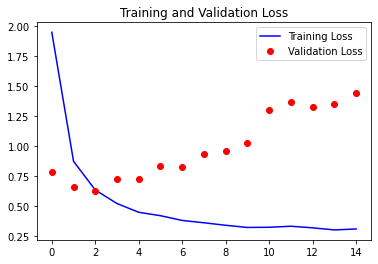

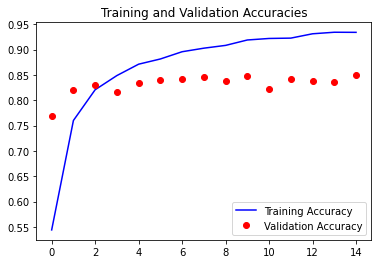

In [112]:
# visulizing results
#loss = history.history["loss"]
#val_loss = history.history["val_loss"]

#epochs = range(len(loss))
#plt.plot(epochs, loss, "b", label="Training Loss")
#plt.plot(epochs, val_loss, "ro", label="Validation Loss")
#plt.title("Training and Validation Loss")
#plt.legend()

#plt.figure()
#acc = history.history["accuracy"]
#val_acc = history.history["val_accuracy"]
#plt.plot(epochs, acc, "b", label="Training Accuracy")
#plt.plot(epochs, val_acc, "ro", label="Validation Accuracy")
#plt.title("Training and Validation Accuracies")
#plt.legend(loc="lower right")

In [125]:
# Final Results
model.evaluate(test)

40/40 [==============================] - 11s 277ms/step - loss: 1.3584 - accuracy: 0.8640


[1.3583920001983643, 0.8640000224113464]

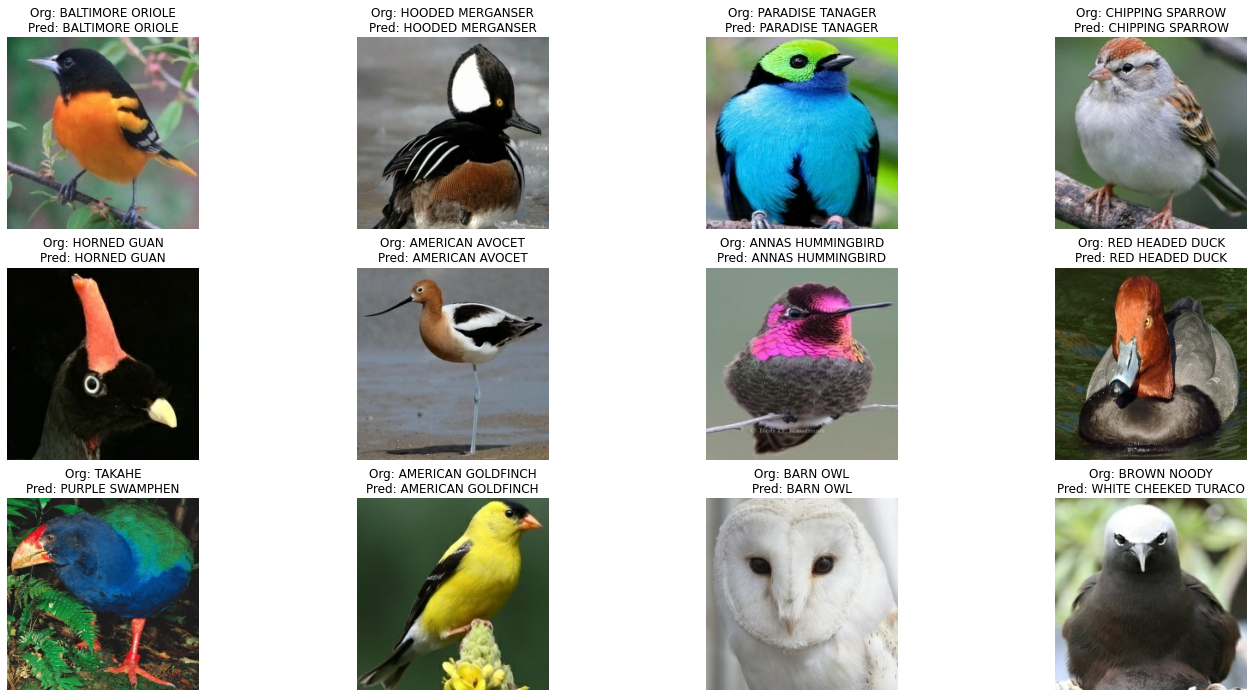

In [114]:
#test_data
for images, labels in test.take(1):
    pred = learn.predict(images)
    labels = np.argmax(labels, axis=-1)
    pred = np.argmax(pred, axis=-1)
    plt.figure(figsize=(24, 12))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Org: {lbl[labels[i]]}\nPred: {lbl[pred[i]]}")
        plt.axis("off")
    plt.show()

In [115]:
#labelsArr =  np.array([])
#for x, y in test:
  #labelsArr = np.concatenate([labelsArr, np.argmax(y.numpy(), axis=-1)])

In [144]:
# importing necessary libraries and functions for further procedure  
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [136]:
# setting up for confusion matrix
predictions = np.array([])
labels_test =  np.array([])
for x, y in test:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
  labels_test = np.concatenate([labels_test, np.argmax(y.numpy(), axis=-1)])

In [138]:
# confusion matrix
conf_matrix = confusion_matrix(labels_test, predictions)
conf_matrix

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 4, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 4]])

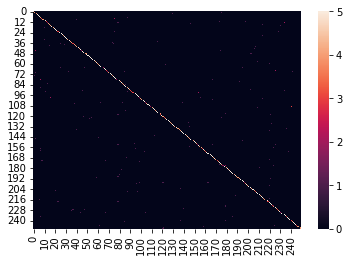

In [139]:
#heatmap of confusion matrix
import seaborn as sns
sns.heatmap(conf_matrix)

In [148]:
# Print prediction metrics

# Classification report
classif_report = classification_report(labels_test, predictions)
print(classif_report)

 # Accuracy
acc = accuracy_score(labels_test, predictions)
 # Precision
prec = precision_score(labels_test, predictions,average='weighted')
 # Recall
rec =  recall_score(labels_test, predictions,average='weighted')
print('Testing accuracy: %.2f'%(acc.item()*100),'%')
print('Testing precision: %.2f'%(prec*100),'%','\nTesting recall: %.2f'%(rec*100),'%')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       0.80      0.80      0.80         5
         2.0       0.56      1.00      0.71         5
         3.0       1.00      0.80      0.89         5
         4.0       1.00      1.00      1.00         5
         5.0       1.00      1.00      1.00         5
         6.0       0.83      1.00      0.91         5
         7.0       0.40      0.80      0.53         5
         8.0       0.75      0.60      0.67         5
         9.0       1.00      0.80      0.89         5
        10.0       0.60      0.60      0.60         5
        11.0       0.71      1.00      0.83         5
        12.0       1.00      0.60      0.75         5
        13.0       0.67      0.40      0.50         5
        14.0       1.00      0.80      0.89         5
        15.0       0.80      0.80      0.80         5
        16.0       0.67      0.80      0.73         5
        17.0       1.00    